# PyTorch for CIFAR10
We test VGG classifier.
First init some basic environment.

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# VGG11 classifier

In [6]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history
from classifiers.vgg import VGG11, VGG13

vgg = VGG11()
print(vgg)

_VGG(
  (layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=2

# train VGG11


In [7]:
%%time
opt = optim.SGD(vgg.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4, nesterov=True)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(vgg, opt, loss_fn)
reduce_lr = lambda epoch: 0.1 ** (epoch // 50)
lr_scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=[reduce_lr])
# lr_scheduler = None
history = solver.train(epochs=150, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/200, lr:1.00e-01
[##################################################] 100.00% loss:2.1 acc:19.52% val_loss:1.7 val_acc:34.36%
Epoch: 2/200, lr:1.00e-01
[##################################################] 100.00% loss:1.4 acc:46.19% val_loss:1.3 val_acc:51.34%
Epoch: 3/200, lr:1.00e-01
[##################################################] 100.00% loss:1.1 acc:60.22% val_loss:1.4 val_acc:52.04%
Epoch: 4/200, lr:1.00e-01
[##################################################] 100.00% loss:0.92 acc:67.58% val_loss:0.91 val_acc:69.20%
Epoch: 5/200, lr:1.00e-01
[##################################################] 100.00% loss:0.82 acc:71.47% val_loss:0.97 val_acc:67.20%
Epoch: 6/200, lr:1.00e-01
[##################################################] 100.00% loss:0.74 acc:74.34% val_loss:1.0 val_acc:67.74%
Epoch: 7/200, 

[##################################################] 100.00% loss:0.0076 acc:99.84% val_loss:0.35 val_acc:91.70%
Epoch: 119/200, lr:1.00e-03
[##################################################] 100.00% loss:0.007 acc:99.86% val_loss:0.35 val_acc:91.72%
Epoch: 120/200, lr:1.00e-03
[##################################################] 100.00% loss:0.0074 acc:99.83% val_loss:0.35 val_acc:91.54%
Epoch: 121/200, lr:1.00e-03
[##################################################] 100.00% loss:0.0068 acc:99.86% val_loss:0.35 val_acc:91.68%
Epoch: 122/200, lr:1.00e-03
[##################################################] 100.00% loss:0.0063 acc:99.87% val_loss:0.35 val_acc:92.08%
Epoch: 123/200, lr:1.00e-03
[##################################################] 100.00% loss:0.0062 acc:99.88% val_loss:0.35 val_acc:91.68%
Epoch: 124/200, lr:1.00e-03
[##################################################] 100.00% loss:0.006 acc:99.88% val_loss:0.36 val_acc:91.62%
Epoch: 125/200, lr:1.00e-03
[##############

# plot VGG11 loss history
We check the classifier by plotting the loss and acc.

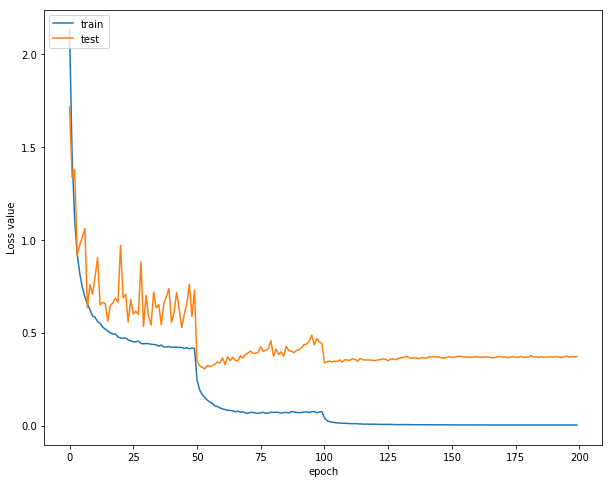

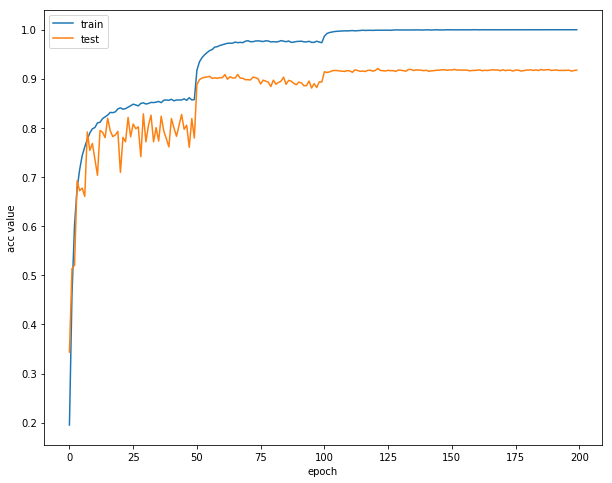

In [8]:
plot_history(history)

# test VGG11 classifier
test on test data

In [9]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.2} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.37 test_acc:91.74%
